# Reastaurat Rating Prediction

Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error

Loading the datasets

In [ ]:
zomato_df = pd.read_csv('zomato.csv',encoding='latin-1')

In [ ]:
country_df = pd.read_excel('Country-Code.xlsx')

In [ ]:
zomato_df = zomato_df.merge(country_df,how='left',on='Country Code')

In [ ]:
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [ ]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
zomato_df.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,...,9551,9551,9551,9551,9551.000000,9551.000000,9551,9551,9551.000000,9551
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,...,2,2,2,1,NaN,NaN,6,6,NaN,15
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,...,No,No,No,No,NaN,NaN,Orange,Average,NaN,India
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,...,8393,7100,9517,9551,NaN,NaN,3737,3737,NaN,8652
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,...,NaN,NaN,NaN,NaN,1.804837,2.666370,NaN,NaN,156.909748,NaN
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,...,NaN,NaN,NaN,NaN,0.905609,1.516378,NaN,NaN,430.169145,NaN
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,...,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,...,NaN,NaN,NaN,NaN,1.000000,2.500000,NaN,NaN,5.000000,NaN
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,...,NaN,NaN,NaN,NaN,2.000000,3.200000,NaN,NaN,31.000000,NaN
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,...,NaN,NaN,NaN,NaN,2.000000,3.700000,NaN,NaN,131.000000,NaN


Checking for missing values

In [ ]:
missing_values=zomato_df.isnull().sum().sort_values(ascending=False)
print(missing_values)

Cuisines                9
Restaurant ID           0
Country Code            0
City                    0
Address                 0
Restaurant Name         0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64


Unique values in key columns

In [ ]:
zomato_df.nunique()

,0
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


In [ ]:
zomato_df['Aggregate rating'].value_counts().sort_index()

,count
Aggregate rating,
0.0,2148
1.8,1
1.9,2
2.0,7
2.1,15
2.2,27
2.3,47
2.4,87
2.5,110


Plotting-Distribution of Aggregate Ratings

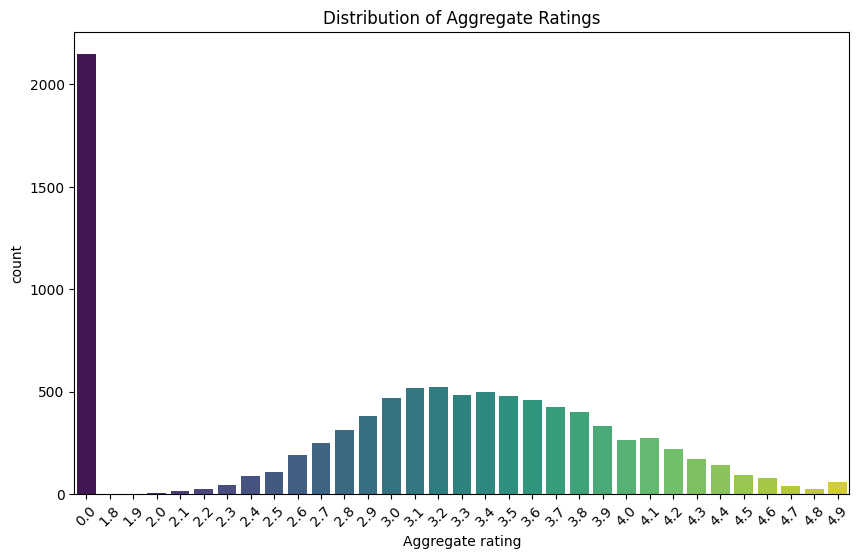

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=zomato_df, x='Aggregate rating', palette='viridis')
plt.title("Distribution of Aggregate Ratings")
plt.xticks(rotation=45)
plt.show()

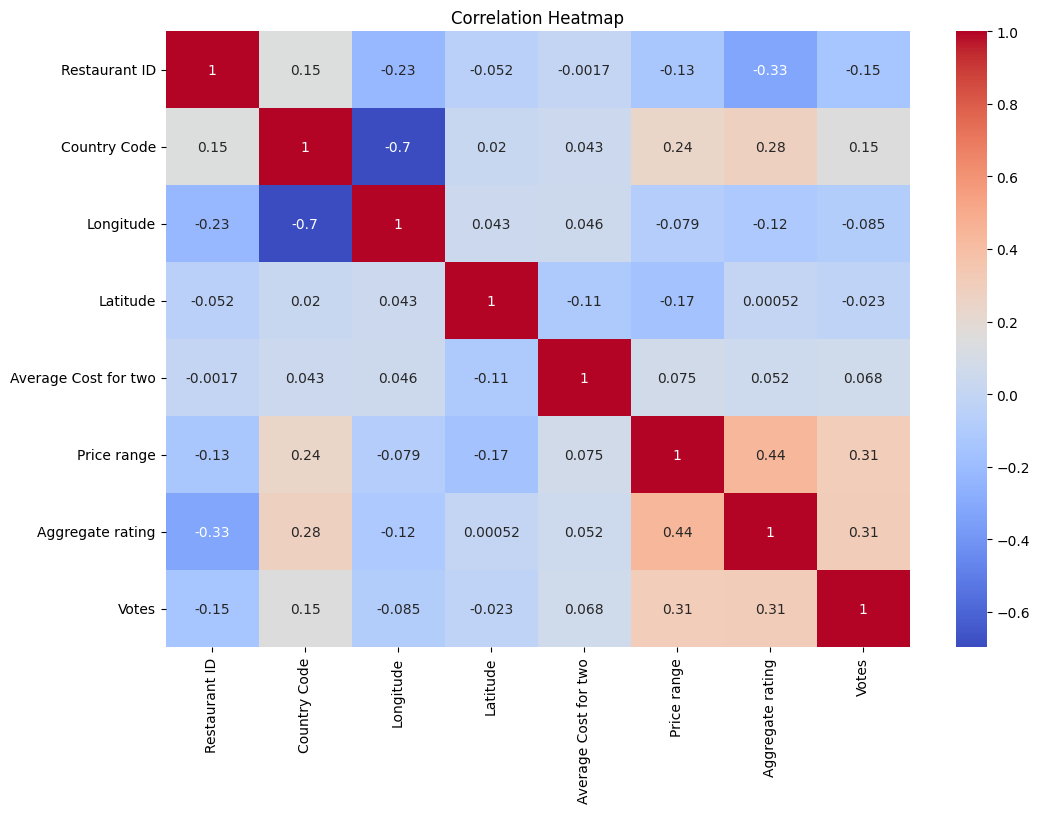

In [ ]:
plt.figure(figsize=(12, 8))
numeric_cols = zomato_df.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Handling Missing Values

In [ ]:
zomato_df['Cuisines'].fillna('Unknown', inplace=True)

In [ ]:
irrelevant_cols = [
    'Restaurant ID', 'Address', 'Locality Verbose',
    'Switch to order menu', 'Rating color', 'Rating text', 'Currency',
    'Menu item', 'Phone','Country Code', 'Longitude', 'Latitude'
]
zomato_df_cleaned = zomato_df.drop(columns=irrelevant_cols, errors='ignore')


In [ ]:
zomato_df_cleaned.columns.tolist()

['Restaurant Name',
 'City',
 'Locality',
 'Cuisines',
 'Average Cost for two',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Price range',
 'Aggregate rating',
 'Votes',
 'Country']

Encoding Categorical values

In [ ]:
categorical_cols_cleaned = zomato_df_cleaned.select_dtypes(include='object').columns
label_encoders_cleaned = {}
for col in categorical_cols_cleaned:
    le = LabelEncoder()
    zomato_df_cleaned[col] = le.fit_transform(zomato_df_cleaned[col])
    label_encoders_cleaned[col] = le  # Save for decoding later if needed

In [ ]:
X = zomato_df_cleaned.drop(['Aggregate rating'], axis=1)
y = zomato_df_cleaned['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
print("Linear Regression")
print("MSE:", mean_squared_error(y_test, lr_preds))
print("R2 Score:", r2_score(y_test, lr_preds))
print("MAE: ",mean_absolute_error(y_test, lr_preds))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, lr_preds)), '\n')

Linear Regression
MSE: 1.5752643461989708
R2 Score: 0.3079134817771704
MAE:  1.04950736332157
RMSE:  1.255095353428962 



Deciosion Tree Regressor

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
print("Decision Tree Regressor")
print("MSE:", mean_squared_error(y_test, dt_preds))
print("R2 Score:", r2_score(y_test, dt_preds))
print("MAE: ",mean_absolute_error(y_test, dt_preds))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, dt_preds)), '\n')

Decision Tree Regressor
MSE: 0.19099424385138672
R2 Score: 0.916087390953358
MAE:  0.28377812663526947
RMSE:  0.43702888217071734 



Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Not using scaled
rf_preds = rf.predict(X_test)
print("Random Forest Regressor")
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R2 Score:", r2_score(y_test, rf_preds))
print("MAE: ",mean_absolute_error(y_test, rf_preds))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, rf_preds)), '\n')

Random Forest Regressor
MSE: 0.09273870695970694
R2 Score: 0.9592555948091496
MAE:  0.19704290947148095
RMSE:  0.3045303054865097 



Comparing Models and Identifing the best model

In [ ]:
results = {
    'Linear Regression': {'MSE': mean_squared_error(y_test, lr_preds), 'R2': r2_score(y_test, lr_preds)},
    'Decision Tree': {'MSE': mean_squared_error(y_test, dt_preds), 'R2': r2_score(y_test, dt_preds)},
    'Random Forest': {'MSE': mean_squared_error(y_test, rf_preds), 'R2': r2_score(y_test, rf_preds)}
}
print("Model Comparison:")
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")

best_model = max(results, key=lambda x: results[x]['R2'])
print(f"\nBest Model based on R2 Score: {best_model}")

Model Comparison:
Linear Regression: MSE = 1.5753, R2 = 0.3079
Decision Tree: MSE = 0.1910, R2 = 0.9161
Random Forest: MSE = 0.0927, R2 = 0.9593

Best Model based on R2 Score: Random Forest


In [ ]:
# Step 7: Predict for New Input Manually
new_input = {
    'Cuisines': 'Pizza',                 # Will be encoded
    'Average Cost for two': 500,
    'Price range': 2,
    'Votes': 200,
    'Has Table booking': 'No',
    'Has Online delivery': 'Yes',
    'Is delivering now': 'Yes',
    'Switch to order menu': 'No',         # Removed as it was dropped from training data
    'Has Online delivery.1': 'Yes',
    'Country': 'India'
}


In [ ]:
new_df = pd.DataFrame([new_input])

In [ ]:
# Step 7: Predict for New Input Manually
new_input = {
    # 'Restaurant Name': 'Dominos Pizza',  # Removed as it was dropped from training data
    'Cuisines': 'Pizza',                 # Will be encoded
    'Average Cost for two': 500,
    'Price range': 2,
    'Votes': 200,
    'Has Table booking': 'No',
    'Has Online delivery': 'Yes',
    'Is delivering now': 'Yes',
    'Switch to order menu': 'No',         # Removed as it was dropped from training data
    'Has Online delivery.1': 'Yes',
    'Country': 'India'
}

new_df = pd.DataFrame([new_input])

# Encode using saved LabelEncoders
# We only need to encode the columns that were encoded during training
categorical_cols_for_encoding = [col for col in new_df.columns if col in label_encoders_cleaned]

for col in categorical_cols_for_encoding:
    # Handle potential unseen labels by using a mapping approach
    # Create a mapping from the encoder's classes
    mapping = {label: i for i, label in enumerate(label_encoders_cleaned[col].classes_)}
    # Map values, using -1 for unknown values (or handle as appropriate for your model)
    new_df[col] = new_df[col].map(mapping).fillna(-1).astype(int) # fillna(-1) handles unseen labels

# Ensure column order matches training data (X)
# Add missing columns from X with a default value (e.g., 0 or median of the training data)
# and ensure the order is correct
missing_cols = set(X.columns) - set(new_df.columns)
for c in missing_cols:
    # Add missing columns with a default value (e.g., 0 or consider using median/mean)
    new_df[c] = 0 # Using 0 as a placeholder, consider a more appropriate value

# Ensure column order matches X.columns
new_df = new_df[X.columns]

# Scale for linear regression (only if the model was trained on scaled data)
# Linear Regression and Random Forest used scaled data, Decision Tree did not
new_df_scaled = scaler.transform(new_df)

print("\nManual Input Predictions:")
# Predict using the appropriate data (scaled for LR and RF, original for DT)
print("Linear Regression:", round(lr.predict(new_df_scaled)[0], 2))
print("Decision Tree:", round(dt.predict(new_df)[0], 2))
print("Random Forest:", round(rf.predict(new_df)[0], 2)) # Use scaled data for Random Forest


Manual Input Predictions:
Linear Regression: 3.59
Decision Tree: 4.6
Random Forest: 3.73


In [ ]:
print("Random Forest:", round(rf.predict(new_df)[0], 2))  # No scaling


Random Forest: 3.73


In [ ]:
best_model = max(results, key=lambda x: results[x]['R2'])


In [ ]:
best_model

'Random Forest'

In [ ]:
import pickle


with open('best_model_rf.pkl', 'wb') as file:
    pickle.dump(rf, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders_cleaned, file)
